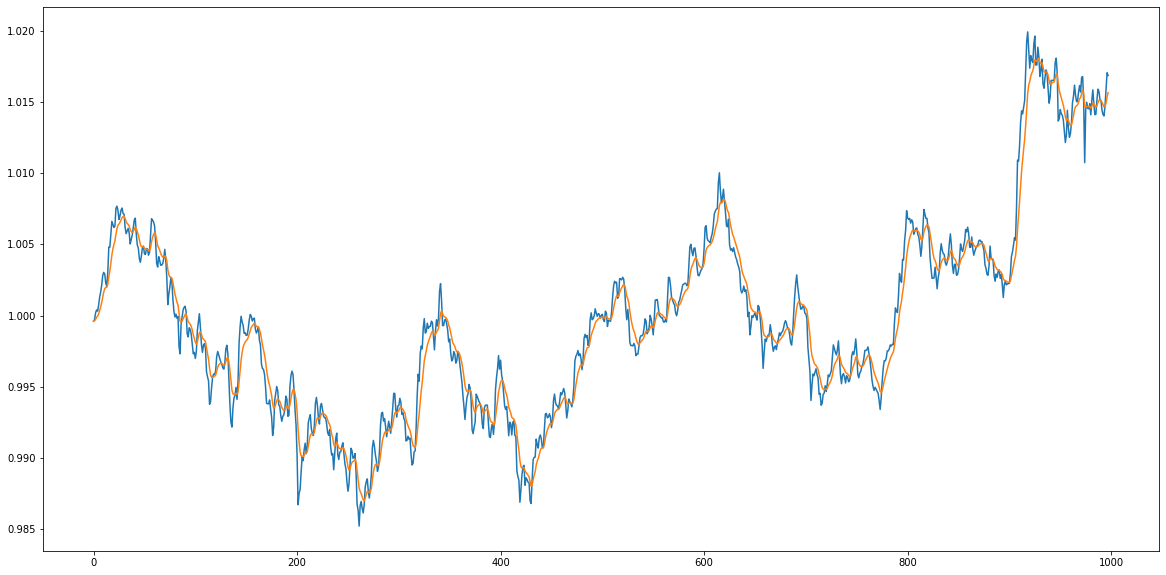

In [106]:
# Valores delta
#
#
#import matplotlib.pyplot as plt
import json, numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
with open('../datasets/eth-usdt-1m.json') as datafile:
  data = json.load(datafile)

avg = np.array([item['avg_price'] for item in data])

kappa = lambda k: k - 1 if k > 1.0 else 1+(-1/k)
dekappa = lambda k: k + 1 if k > 0.0 else (-1/(k-1))
kappas = lambda vals: np.array([ kappa(val) for val in vals])
dekappas = lambda vals: np.array([ dekappa(val) for val in vals ])
deltas = lambda vals: np.array([ val / vals[idx-1] for idx, val in enumerate(vals) if idx > 1])


def scat(*args, **kw):
    return list(map(lambda x: x-FROM, args)), list(t[x] for x in args)

def track(deltas):
    res = np.zeros(len(deltas))
    acc = 1.0
    for i, delta in enumerate(deltas):
        acc *= delta
        res[i] = acc
    return res

def ema(exp, datum):
    result = np.zeros(len(datum))
    s = datum[0]
    result[0] = datum[0]
    for idx in range(1, len(datum)):
        s = exp*datum[idx] + (1-exp)*s
        result[idx] = s
    return result

def ema1(exp, datum):
    result = np.zeros(len(datum))
    s = 1
    for idx in range(0, len(datum)):
        s = exp*datum[idx] + (1-exp)*s
        result[idx] = s
    return result



d = deltas(avg)
t = track(d)
k = kappas(d)


FROM, TO = 0, 1000
plt.plot(track(d))
#plt.plot(d[FROM:TO])
#plt.plot(track(ema1(0.05, d[FROM:TO])))

plt.plot(ema(.2, track(d[FROM:TO])))
#plt.plot( track(dekappas(ema(0.3,k))) [FROM:TO])

